# Experiments
link: https://docs.google.com/spreadsheets/d/1ATQJSiua4UExb08QPthAHpX9SjR8lj0hojvHwP6-V6Q/edit#gid=0


## 3.1.2) Visulize data.txt

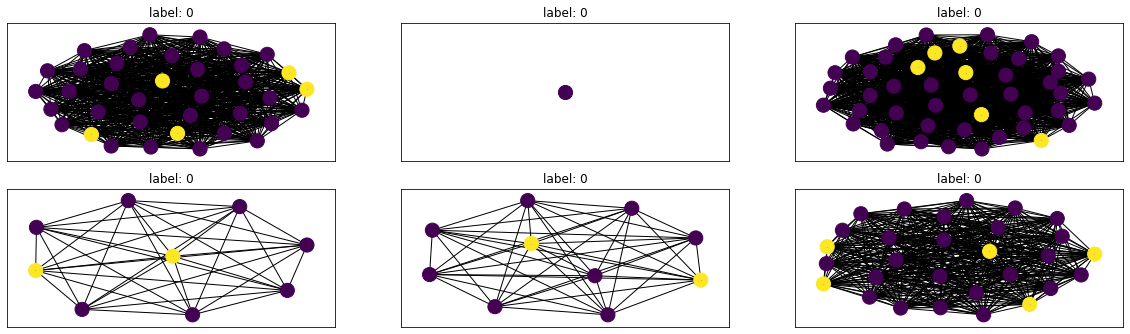

In [1]:
import util
util.visualize_graph(data="pytorch_DGCNN-master/data/DEMO/DEMO.txt", node_size=200, nth=1600, \
                     num_columns=3, figsize=(20,30), is_color_graph=True)

## 3.1.0) Separate rooms into train(train+valid) and test parts

In [2]:
# Train-Test split
import util
util.rooms_train_test_split("rooms_cleaned.txt", 400)

## 3.1.1) Build data.txt

In [3]:
# Build for Train & Valid
import util
util.build_dataset_combined(mode=0, target_name='DEMO', \
                                pos_ind=0, feat_ind=1, base=0, method=0, ratio=5, threshold=100)

AttributeError: module 'util' has no attribute 'build_dataset_combined'

In [3]:
# Build for Train & Test
import util
util.build_dataset_combined(mode=1, target_name='DEMO_TEST', \
                                pos_ind=0, feat_ind=1, base=0, method=0, ratio=5, threshold=100)

(8230, 480)

### Note: There are 10165 graphs in the input file, the first 8250 are for training, the last 1915 are for validation

In [5]:
!head -8 pytorch_DGCNN-master/data/DEMO/DEMO.txt
# !head -8 pytorch_DGCNN-master/data/DEMO_TEST/DEMO_TEST.txt

10135
10 0
1 9 1 2 3 4 5 6 7 8 9 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
1 9 0 2 3 4 5 6 7 8 9 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
1 9 0 1 3 4 5 6 7 8 9 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

## 3.2) Build up train/valid split
### Note: we use: 
    folder 3 for train/valid split
    folder 4 for train/test split

In [6]:
# for Train & Valid
import util
util.build_train_valid_split_fold(3, 'DEMO', 8250, 1915)
!head -10 ./pytorch_DGCNN-master/data/DEMO/10fold_idx/test_idx-3.txt

8250
8251
8252
8253
8254
8255
8256
8257
8258
8259


In [7]:
# for Train & Test
import util
util.build_train_valid_split_fold(4, 'DEMO_TEST', 8250, 480)
!head -10 ./pytorch_DGCNN-master/data/DEMO_TEST/10fold_idx/test_idx-4.txt

8250
8251
8252
8253
8254
8255
8256
8257
8258
8259


## 3.3) Run DGCNN
    To actually run DGCNN, use VS code for better dynamic visibility
    To record the tuned hyper-parameters, use cells below
    To see the visualization of training process, open train_process.png

In [14]:
%cd ..
!pwd

/home/igor/Desktop/tao/tisl
/home/igor/Desktop/tao/tisl


In [1]:
# Un-tuned: latent-dim, sortpooling_k, max_lv
# for Train & Valid
%cd pytorch_DGCNN-master
!pwd
# With feature
!CUDA_VISIBLE_DEVICES=0 python main.py       \
-seed 1       \
-data DEMO       \
-fold 3       \
-learning_rate 0.005      \
-num_epochs 50     \
-hidden 256       \
-latent_dim 64-32-32-16-8       \
-sortpooling_k 1       \
-out_dim 32       \
-batch_size 256       \
-gm DGCNN       \
-mode gpu       \
-dropout True       \
-test_number 1915 \
-extract_features True \
-max_lv 5 \
-visualize_process True

/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
====== begin of gnn configuration ======
| msg_average = 0
======   end of gnn configuration ======
Namespace(batch_size=256, conv1d_activation='ReLU', data='DEMO', dropout=True, edge_feat_dim=0, extract_features=True, feat_dim=0, fold=3, gm='DGCNN', hidden=256, latent_dim=[64, 32, 32, 16, 8], learning_rate=0.005, max_lv=5, mode='gpu', num_class=0, num_epochs=50, out_dim=32, printAUC=False, seed=1, sortpooling_k=1.0, test_number=1915, visualize_process=True)
loading data
# classes: 397
# maximum node tag: 2
# train: 8250, # test: 1915
k used in SortPooling is: 24
Initializing DGCNN
loss: 5.56844 acc: 0.01953: 100%|████████████| 32/32 [00:02<00:00, 14.50batch/s]
average training of epoch 0: loss 5.81370 acc 0.01208 auc 0.00000
loss: 5.66260 acc: 0.04065: 100%|██████████████| 8/8 [00:00<00:00, 31.81batch/s]
average test of epoch 0: loss 5.91246 acc

In [7]:
# for Train & Test
%cd pytorch_DGCNN-master
!pwd
# With feature
!CUDA_VISIBLE_DEVICES=0 python main.py       \
-seed 1       \
-data DEMO_TEST       \
-fold 4       \
-learning_rate 0.005      \
-num_epochs 50     \
-hidden 256       \
-latent_dim 64-32-32-16-8       \
-sortpooling_k 1       \
-out_dim 32       \
-batch_size 256       \
-gm DGCNN       \
-mode gpu       \
-dropout True       \
-test_number 480 \
-extract_features True \
-max_lv 5 \
-visualize_process True

[Errno 2] No such file or directory: 'pytorch_DGCNN-master'
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
/home/igor/Desktop/tao/tisl/tisl_localization_22s/pytorch_DGCNN-master
====== begin of gnn configuration ======
| msg_average = 0
======   end of gnn configuration ======
Namespace(batch_size=256, conv1d_activation='ReLU', data='DEMO_TEST', dropout=True, edge_feat_dim=0, extract_features=True, feat_dim=0, fold=4, gm='DGCNN', hidden=256, latent_dim=[64, 32, 32, 16, 8], learning_rate=0.005, max_lv=5, mode='gpu', num_class=0, num_epochs=50, out_dim=32, printAUC=False, seed=1, sortpooling_k=1.0, test_number=480, visualize_process=True)
loading data
# classes: 396
# maximum node tag: 1
# train: 8230, # test: 480
k used in SortPooling is: 12
Initializing DGCNN
loss: 5.36212 acc: 0.00781: 100%|████████████| 32/32 [00:02<00:00, 15.78batch/s]
average training of epoch 0: loss 5.74976 acc 0.01318 auc 0.00000
loss: 6.56835 acc: 0.00000: 100%|██████████████| 2/2 [00:00

loss: 1.23837 acc: 0.64062: 100%|████████████| 32/32 [00:01<00:00, 22.07batch/s]
average training of epoch 24: loss 1.12697 acc 0.66150 auc 0.00000
loss: 27.96311 acc: 0.00000: 100%|█████████████| 2/2 [00:00<00:00, 36.78batch/s]
average test of epoch 24: loss 27.20175 acc 0.00000 auc 0.00000
loss: 1.13320 acc: 0.66797: 100%|████████████| 32/32 [00:01<00:00, 21.88batch/s]
average training of epoch 25: loss 1.11029 acc 0.66711 auc 0.00000
loss: 27.46571 acc: 0.00000: 100%|█████████████| 2/2 [00:00<00:00, 36.40batch/s]
average test of epoch 25: loss 26.58155 acc 0.00000 auc 0.00000
loss: 1.00476 acc: 0.68750: 100%|████████████| 32/32 [00:01<00:00, 22.63batch/s]
average training of epoch 26: loss 1.09861 acc 0.66833 auc 0.00000
loss: 28.31788 acc: 0.00000: 100%|█████████████| 2/2 [00:00<00:00, 36.96batch/s]
average test of epoch 26: loss 26.94047 acc 0.00000 auc 0.00000
loss: 1.23440 acc: 0.62891: 100%|████████████| 32/32 [00:01<00:00, 22.64batch/s]
average training of epoch 27: loss 1.049

## 3.4) Get top-1 & top-5 scores

In [1]:
from top_n import get_top_n_score
import os
from os.path import join
test_set_list = os.listdir('experiment_sets')

for test_set in test_set_list:  
    top1_score_test1, top5_score_test1 = get_top_n_score(join('experiment_sets', test_set))
    print('Top-1 score for {}: {}'.format(test_set, top1_score_test1))
    print('Top-5 score for {}: {}'.format(test_set, top5_score_test1))

Top-1 score for test_set_3_2.txt: 0.5104166666666666
Top-5 score for test_set_3_2.txt: 0.7583333333333333
Top-1 score for test_set_1_2.txt: 0.3875
Top-5 score for test_set_1_2.txt: 0.70625
Top-1 score for test_set_2_1.txt: 0.5729166666666666
Top-5 score for test_set_2_1.txt: 0.5729166666666666
Top-1 score for test_set_1_1.txt: 0.44166666666666665
Top-5 score for test_set_1_1.txt: 0.7666666666666667
Top-1 score for test_set_3_3.txt: 0.5583333333333333
Top-5 score for test_set_3_3.txt: 0.7604166666666666
Top-1 score for test_set_1_3.txt: 0.40208333333333335
Top-5 score for test_set_1_3.txt: 0.6541666666666667
Top-1 score for test_set_2_3.txt: 0.6145833333333334
Top-5 score for test_set_2_3.txt: 0.6145833333333334
Top-1 score for test_set_3_1.txt: 0.6541666666666667
Top-5 score for test_set_3_1.txt: 0.8520833333333333
Top-1 score for test_set_2_2.txt: 0.4270833333333333
Top-5 score for test_set_2_2.txt: 0.4270833333333333
